Q3: Comparing Optimizers – Adam vs. RMSprop vs. SGD

Task: Optimizers influence training speed and accuracy. You will train a deep learning model using different optimizers and compare their performance.

1.	Implement a feedforward neural network for digit classification (use the MNIST dataset).

2.	Train the model three times, each time using a different optimizer (Adam, RMSprop, SGD).

3.	Record the training loss & accuracy for each optimizer.

4.	Plot the loss curves for all three optimizers.

5.	Compare the convergence speed & final accuracy: Which optimizer performs best and why?

Hint: Use tensorflow.keras.optimizers.Adam(), RMSprop(), and SGD().


In [1]:
# Import libraries
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [3]:
# Flatten the images
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

In [4]:
# Feedforward model
def build_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu', input_shape=(784,)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    return model

In [5]:
# Optimizers
optimizers = {
    'Adam': tf.keras.optimizers.Adam(),
    'RMSprop': tf.keras.optimizers.RMSprop(),
    'SGD': tf.keras.optimizers.SGD()
}

histories = {}

In [6]:
# Train and record history for each optimizer
for name, opt in optimizers.items():
    print(f"Training with {name} optimizer")
    model = build_model()
    model.compile(optimizer=opt,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=10, batch_size=128,
                        validation_data=(x_test, y_test), verbose=0)
    histories[name] = history

Training with Adam optimizer


c:\Users\johnw\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training with RMSprop optimizer
Training with SGD optimizer


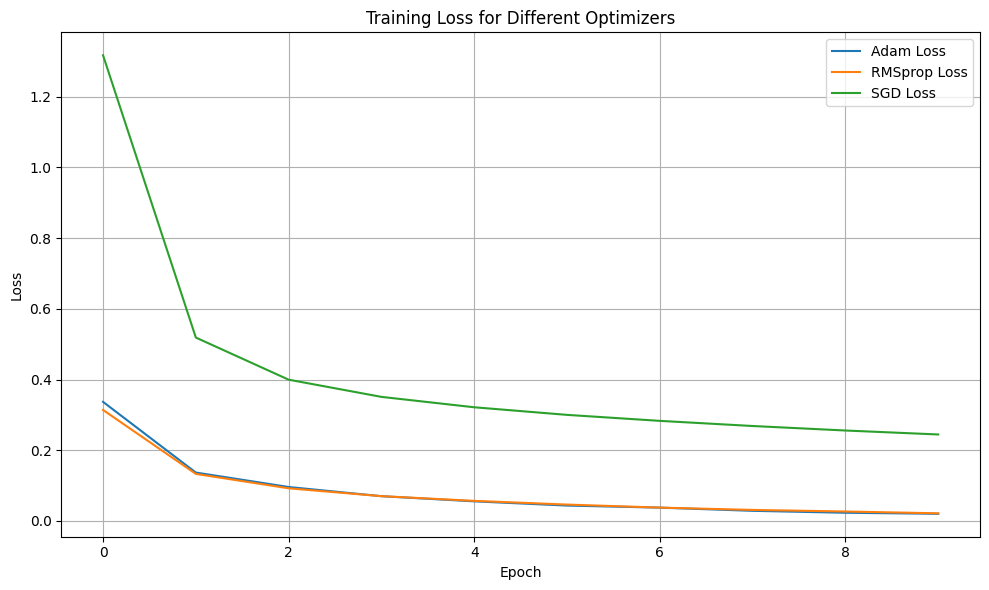

In [7]:
# Plot training loss
plt.figure(figsize=(10, 6))
for name, history in histories.items():
    plt.plot(history.history['loss'], label=f'{name} Loss')
plt.title('Training Loss for Different Optimizers')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [11]:
# Print final validation accuracy
print("\nFinal Validation Accuracy:")
for name, history in histories.items():
    final_acc = history.history['val_accuracy'][-1]
    print(f"{name}: {final_acc:.3f}")


Final Validation Accuracy:
Adam: 0.978
RMSprop: 0.979
SGD: 0.932


ADAM and RMSprop have similar convergence speeds where as SGD is much slower. Again final accuracy of Adam and RMSprop are very similar with RMSprop slightly better while SGD has lower accuracy. Some explination for this given our model is that SGD uses a fixed learning rate which makes it bad at learning on MNIST data which had a wide range of gradients due to the large amount of background space. Unable to adjust for the small background gradients and larger inner digit gradients, SGD requires more time/epochs to train and may plateau faster.